## The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise**.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [133]:
df= pd.read_csv("creditcard.csv")

In [134]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [135]:
df.shape

(284807, 31)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

In [137]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*As we can see from the above that our data does not have any null values*

## Let's check that our Target variable is balanced or imbalanced.

In [138]:
counts= df['Class'].value_counts()

In [139]:
counts

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

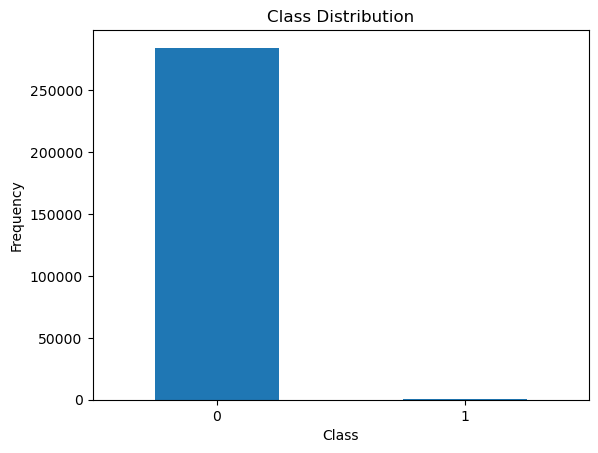

In [140]:
counts.plot(kind= 'bar', rot=0)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='Class', ylabel='count'>

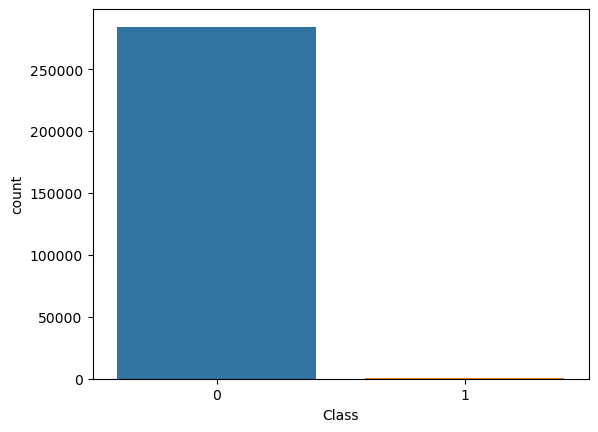

In [141]:
sns.countplot(df['Class'])

### As we can see from the above our data is imbalanced

In [142]:
fraud= df[df['Class']==1]
normal= df[df['Class']==0]

In [143]:
normal.shape, fraud.shape

((284315, 31), (492, 31))

In [144]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [145]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

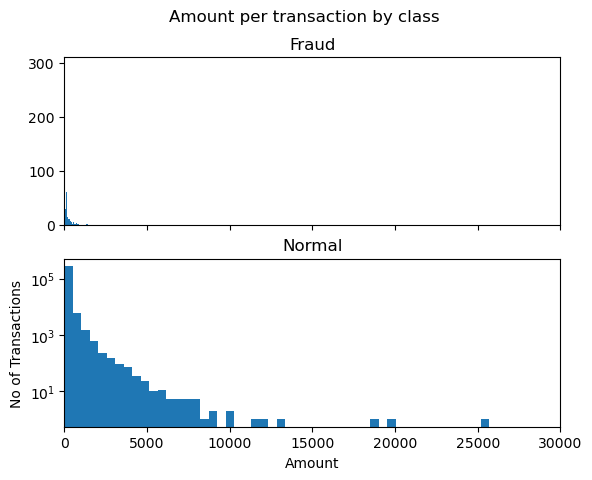

In [146]:
LABELS = ['normal', 'fraud']
t, (axis1, axis2)= plt.subplots(2,1, sharex=True)
t.suptitle('Amount per transaction by class')
bins=50
axis1.hist(fraud.Amount, bins= bins)
axis1.set_title('Fraud')
axis2.hist(normal.Amount, bins= bins)
axis2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('No of Transactions')
plt.xlim(0, 30000)
plt.yscale('log')
plt.show()

In [147]:
corr= df.corr()

In [148]:
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


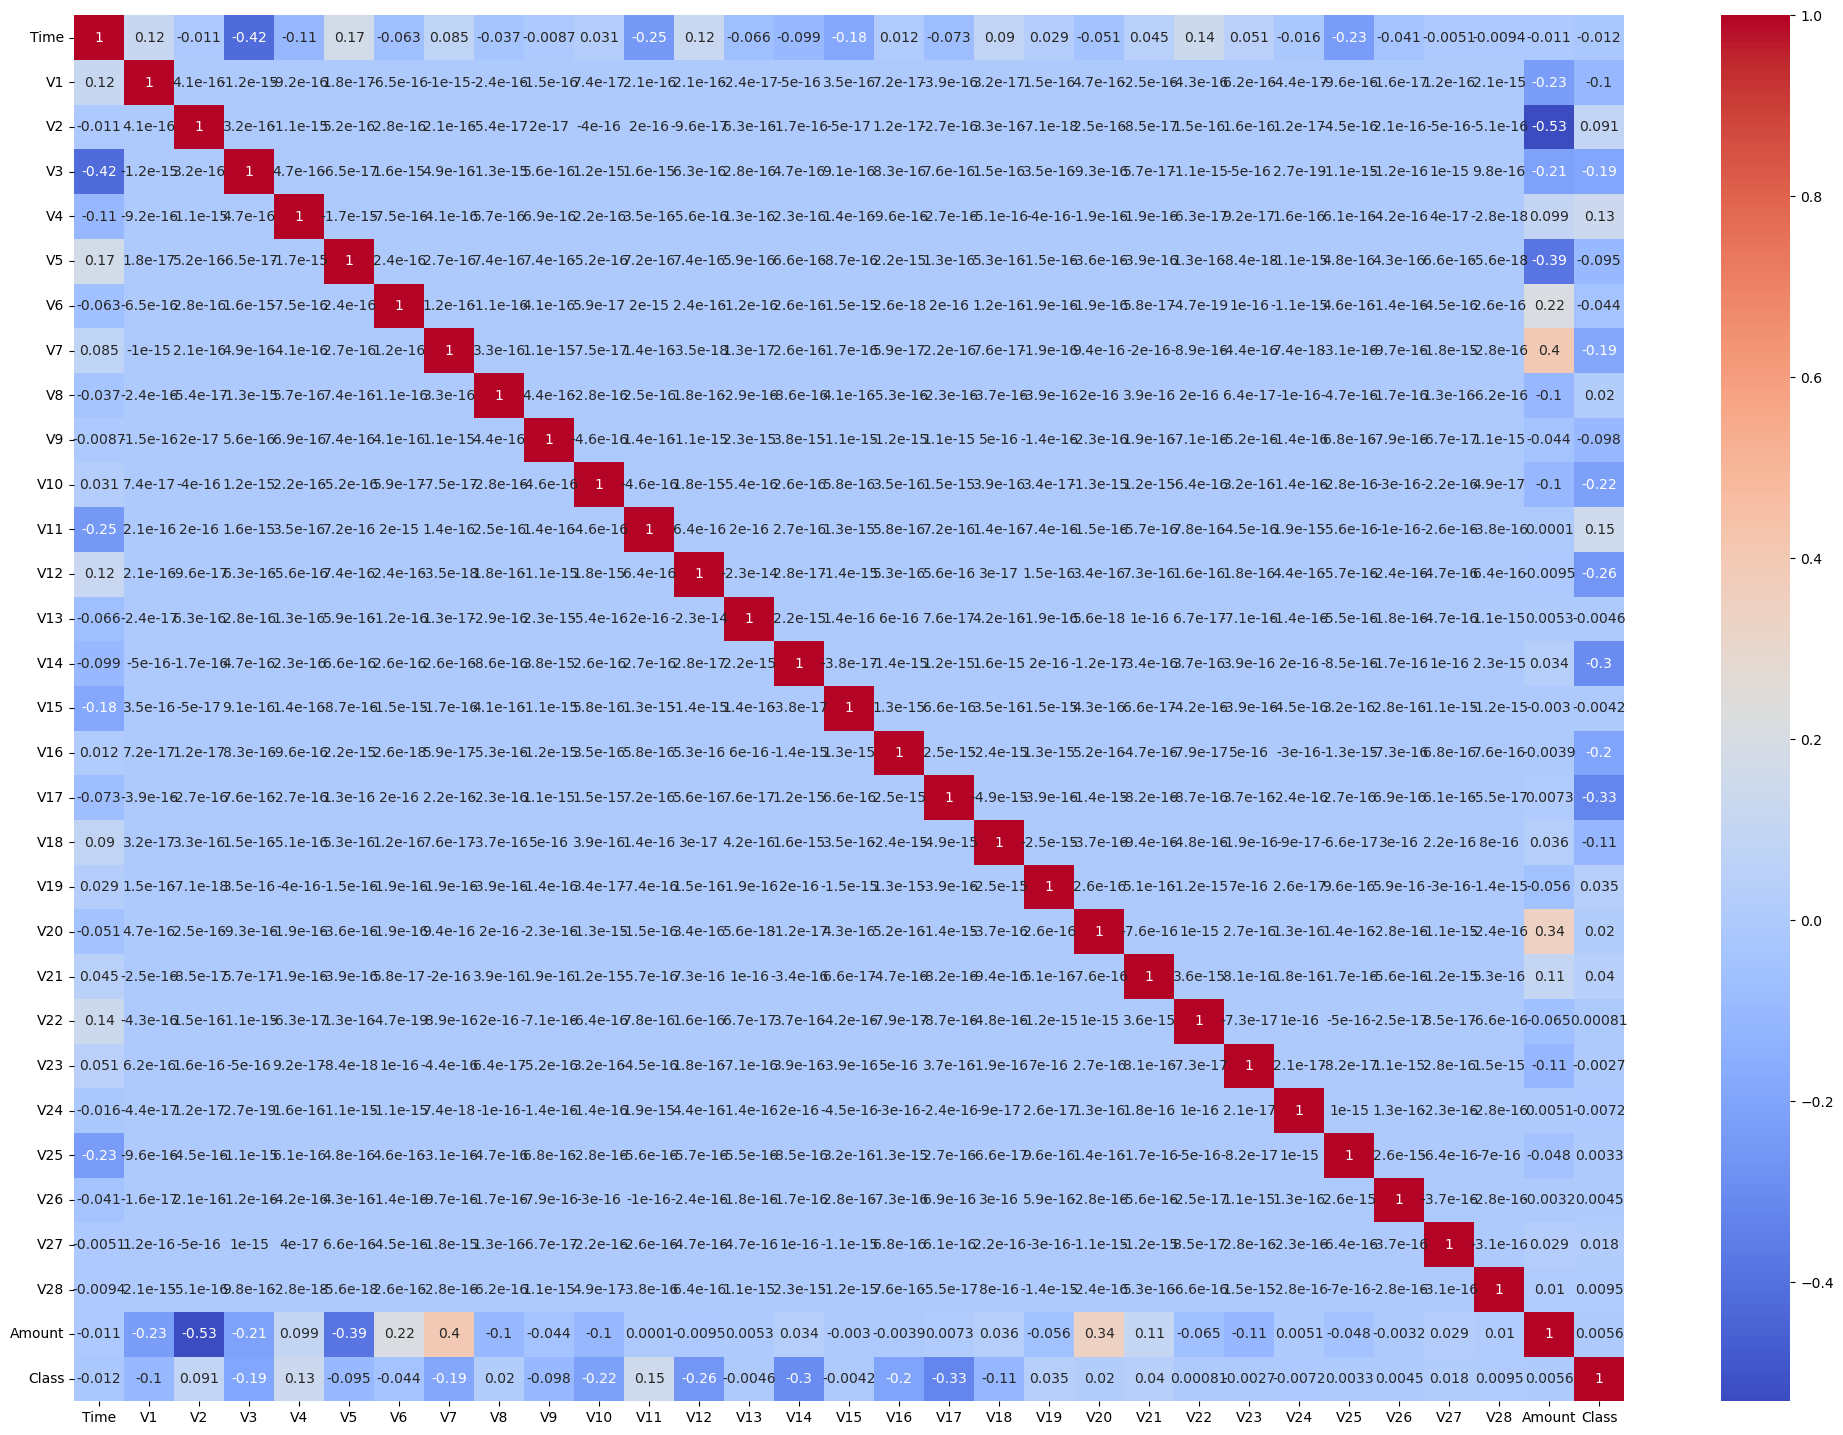

In [149]:
plt.figure(figsize=(25,18))
sns.heatmap(corr, cmap='coolwarm', annot=True)

plt.show()

## As we can see our every features has same scale except "Amount" so we will use Standard Scaler.

In [150]:
sc= StandardScaler()

In [151]:
df['Amount']= sc.fit_transform(pd.DataFrame(df['Amount']))

In [152]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [153]:
Copy_df= df.copy()

In [154]:
df= df.drop(['Time'], axis=1)

In [155]:
df.duplicated().sum()

9144

In [156]:
df= df.drop_duplicates()
df.shape, Copy_df.shape

((275663, 30), (284807, 31))

#  Without handling the imbalanced data lets check the results!!

## Lets Split the data into train and test data using train test split

In [157]:
X= df.drop(['Class'], axis=1)
y= df['Class']

In [158]:
X.shape

(275663, 29)

In [159]:
y.shape

(275663,)

In [160]:
X_tain, X_test, y_train, y_test= train_test_split(X, y, random_state=45, test_size=0.20)

In [161]:
print('%s'%('y='),np.sum(y))
print('%s'%('y_train='),np.sum(y_train))
print('%s'%('y_test='),np.sum(y_test))

y= 473
y_train= 378
y_test= 95


In [162]:
def my_confusion_matrix(y_test, pred_test):
    cm= confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap= plt.cm.Accent)
    cat_names= ['Normal', 'Fraud']
    plt.title('Confusion Matrix - Test data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    ticks= np.arange(len(cat_names))
    plt.xticks(ticks, cat_names, rotation=45)
    plt.yticks(ticks, cat_names)
    
    s=[['TN','FP'],['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

## Logistic Regression

In [163]:
lr= LogisticRegression()

In [164]:
lr.fit(X_tain,y_train)

LogisticRegression()

In [165]:
y_pred1= lr.predict(X_test)

In [166]:
accuracy_score(y_test, y_pred1)

0.9992200678359603

## As our data is imbalanced we cannot go with accuracy score we need to check with precision, recall and f1 score. 

In [167]:
precision_score(y_test, y_pred1)

0.8513513513513513

In [168]:
recall_score(y_test, y_pred1)

0.6631578947368421

In [169]:
f1_score(y_test, y_pred1)

0.7455621301775148

In [170]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.85      0.66      0.75        95

    accuracy                           1.00     55133
   macro avg       0.93      0.83      0.87     55133
weighted avg       1.00      1.00      1.00     55133



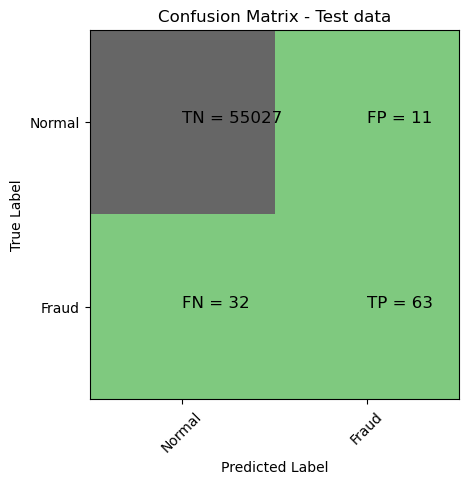

In [171]:
my_confusion_matrix(y_test, y_pred1)

## As we can see from above the without handling the balanced data results are very low so now Lets handle the imbalanced data with Undersampling and Oversampling

### ----------------------------------------------------- Under Sampling ------------------------------------------------------------------

In [172]:
fraud= df[df['Class']==1]
normal= df[df['Class']==0]

In [173]:
normal.shape, fraud.shape

((275190, 30), (473, 30))

In [174]:
normal_sample= normal.sample(n=473)

In [175]:
normal_sample.shape

(473, 30)

In [176]:
new_data= pd.concat([normal_sample,fraud], ignore_index=True)

In [177]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [178]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.986674,-1.156646,-1.829147,-1.044358,-0.154979,-0.322029,-0.243148,-0.142724,-0.635976,0.916631,...,0.104929,-0.037246,0.048572,0.192853,-0.018223,-0.310702,-0.076739,-0.051555,0.188391,0
1,1.380065,-1.262177,-2.055189,0.332142,0.086944,-0.254759,0.518698,-0.189616,0.414387,0.030141,...,0.470942,0.604694,-0.339988,0.316236,0.162542,-0.170484,-0.101084,-0.005349,1.086082,0
2,-1.921281,-0.896551,1.827553,-0.359788,-1.392743,0.440320,0.065287,0.708303,-1.361472,-0.382181,...,0.094167,-0.066437,0.333914,-0.082413,0.539801,-0.348311,-0.107692,-0.065691,0.787505,0
3,1.151860,0.637048,-0.350544,1.183458,0.343965,-0.443998,0.141286,0.032035,-0.376494,-0.561164,...,0.013102,0.116403,-0.108635,-0.111440,0.593567,-0.315469,0.048874,0.044200,-0.349231,0
4,1.187157,-0.370812,0.997921,-0.555966,-1.026317,-0.322471,-0.781558,0.065376,3.216395,-1.476825,...,-0.137969,0.075118,0.006065,0.016771,0.374928,-0.693992,0.076576,0.025557,-0.309850,0


In [179]:
X_unsamp= new_data.drop(['Class'], axis=1)
y_unsamp= new_data['Class']

In [180]:
 X_train, X_test, y_train, y_test= train_test_split(X_unsamp,y_unsamp, random_state=42, test_size=0.20)

## After Undersampling lets check our models.

### Logistic Regression

In [181]:
lr.fit(X_train,y_train)

LogisticRegression()

In [182]:
y_pred2= lr.predict(X_test)

In [183]:
accuracy_score(y_test, y_pred2)

0.9473684210526315

In [184]:
precision_score(y_test, y_pred2)

0.9893617021276596

In [185]:
recall_score(y_test, y_pred2)

0.9117647058823529

In [186]:
f1_score(y_test, y_pred2)

0.9489795918367346

In [187]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        88
           1       0.99      0.91      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



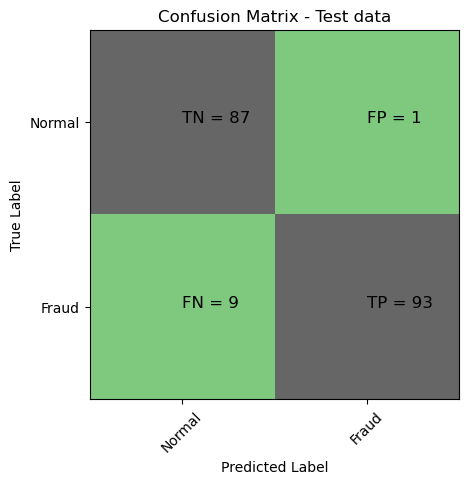

In [188]:
my_confusion_matrix(y_test, y_pred2)

## Decision Tree Classifier

In [189]:
dt= DecisionTreeClassifier()

In [190]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [191]:
y_pred3= dt.predict(X_test)

In [192]:
accuracy_score(y_test, y_pred3)

0.8947368421052632

In [193]:
precision_score(y_test, y_pred3)

0.9019607843137255

In [194]:
recall_score(y_test, y_pred3)

0.9019607843137255

In [195]:
f1_score(y_test, y_pred3)

0.9019607843137255

In [196]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        88
           1       0.90      0.90      0.90       102

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.89      0.89      0.89       190



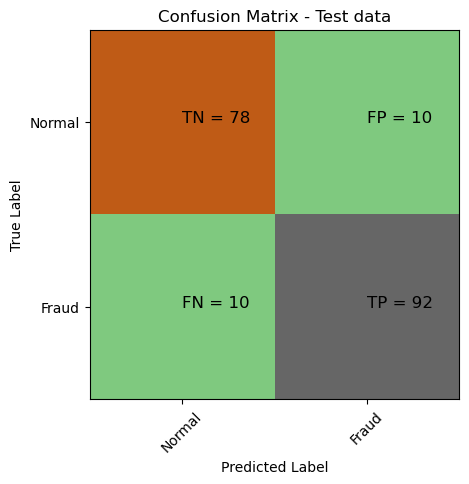

In [197]:
my_confusion_matrix(y_test, y_pred3)

## Random Forest Classifier

In [198]:
rf= RandomForestClassifier()

In [199]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
y_pred4= rf.predict(X_test)

In [201]:
accuracy_score(y_test, y_pred4)

0.9473684210526315

In [202]:
precision_score(y_test, y_pred4)

1.0

In [203]:
recall_score(y_test, y_pred4)

0.9019607843137255

In [204]:
f1_score(y_test, y_pred4)

0.9484536082474228

In [205]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        88
           1       1.00      0.90      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



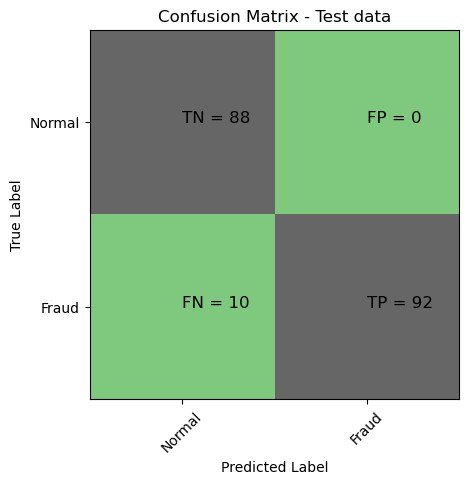

In [206]:
my_confusion_matrix(y_test, y_pred4)

In [207]:
final_data= pd.DataFrame({'Models after Undersampling': ['LR','DT','RF'],
                          
                          'ACC': [ accuracy_score(y_test, y_pred2)*100, accuracy_score(y_test, y_pred3)*100, accuracy_score(y_test, y_pred4)*100], 
                          "Pre": [ precision_score(y_test, y_pred2),precision_score(y_test, y_pred3),precision_score(y_test, y_pred4)]})

In [208]:
final_data

,Models after Undersampling,ACC,Pre
0,LR,94.736842,0.989362
1,DT,89.473684,0.901961
2,RF,94.736842,1.000000


<AxesSubplot:xlabel='Models after Undersampling', ylabel='ACC'>

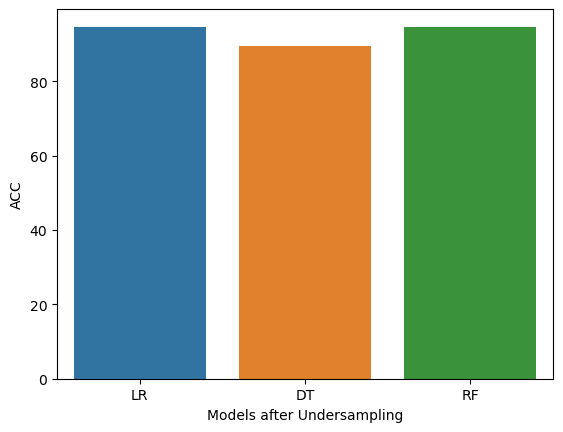

In [209]:
sns.barplot(final_data['Models after Undersampling'],final_data['ACC'])

<AxesSubplot:xlabel='Models after Undersampling', ylabel='Pre'>

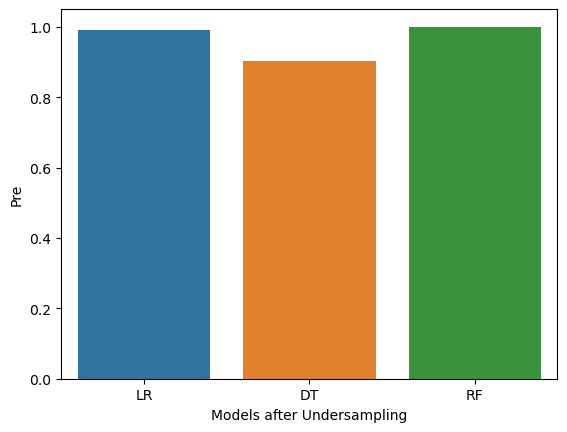

In [210]:
sns.barplot(final_data['Models after Undersampling'],final_data['Pre'])

# Lets now use Over Sampling

In [212]:
X.shape

(275663, 29)

In [213]:
y.shape

(275663,)

In [214]:
from imblearn.over_sampling import SMOTE

In [215]:
X_res, y_res= SMOTE().fit_resample(X,y)

In [216]:
y_res.shape

(550380,)

In [217]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [218]:
 X_train, X_test, y_train, y_test= train_test_split(X_res,y_res, random_state=42, test_size=0.20)

###  Logistic Regression

In [219]:
log= LogisticRegression()

In [220]:
log.fit(X_train,y_train)

LogisticRegression()

In [221]:
y_pred5= log.predict(X_test)

In [222]:
accuracy_score(y_test, y_pred5)

0.9449652967040953

In [223]:
precision_score(y_test, y_pred5)

0.9730539500898846

In [224]:
recall_score(y_test, y_pred5)

0.9152046252022616

In [225]:
f1_score(y_test, y_pred5)

0.9432431419577274

In [226]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.92      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076



### Decision Tree Classifier

In [227]:
dtc= DecisionTreeClassifier()

In [228]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [229]:
y_pred6= dtc.predict(X_test)

In [230]:
accuracy_score(y_test, y_pred6)

0.9980468040263091

In [231]:
precision_score(y_test, y_pred6)

0.9972048787570785

In [232]:
recall_score(y_test, y_pred6)

0.9988909695834772

In [233]:
f1_score(y_test, y_pred6)

0.9980472120546053

In [234]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



------------------------------------------------------------------------------------------------------------------------------

## Random Forest Classifier

In [235]:
rfc= RandomForestClassifier()

In [236]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [237]:
y_pred7= rfc.predict(X_test)

In [238]:
accuracy_score(y_test, y_pred7)

0.9999273229405138

In [239]:
precision_score(y_test, y_pred7)

0.9998545745396376

In [240]:
recall_score(y_test, y_pred7)

1.0

In [241]:
f1_score(y_test, y_pred7)

0.9999272819822931

In [242]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



In [244]:
final_data= pd.DataFrame({'Models after SMOTE': ['LR','DT','RF'],
                          
                          'ACC': [ accuracy_score(y_test, y_pred5)*100,
                                                 accuracy_score(y_test, y_pred6)*100,
                                                 accuracy_score(y_test, y_pred7)*100], 
                          "Pre": [ precision_score(y_test, y_pred5),
                                 precision_score(y_test, y_pred6),
                                precision_score(y_test, y_pred7)]
    
})

In [259]:
final_data

,Models after SMOTE,ACC,Pre
0,LR,94.496530,0.973054
1,DT,99.804680,0.997205
2,RF,99.992732,0.999855


<AxesSubplot:xlabel='Models after SMOTE', ylabel='ACC'>

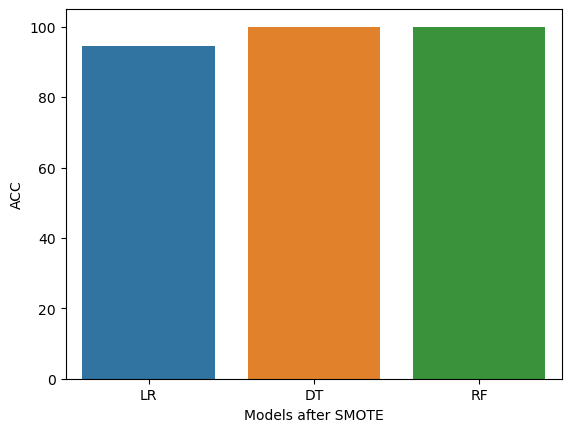

In [245]:
sns.barplot(final_data['Models after SMOTE'],final_data['ACC'])

<AxesSubplot:xlabel='Models after SMOTE', ylabel='Pre'>

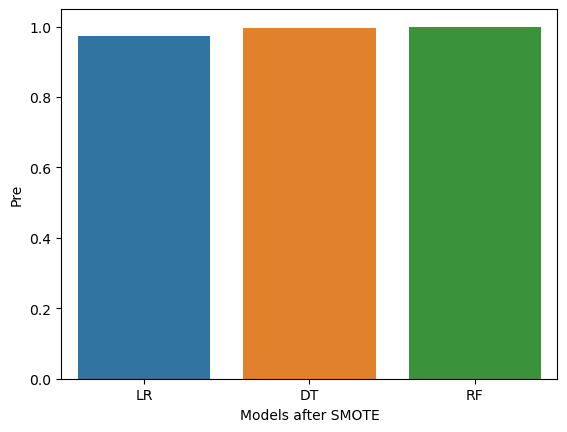

In [246]:
sns.barplot(final_data['Models after SMOTE'],final_data['Pre'])

# As we can compare both Undersampling and Oversampling our best model is Random

## As we only checked with the train test split now its time to use our best model to entire data after Oversampling

In [247]:
rfc1= RandomForestClassifier()
rfc1.fit(X_res, y_res)

RandomForestClassifier()

## Let's Save the Model

In [248]:
import joblib
joblib.dump(rfc1, 'credit_card_fraud_detection_model')

['credit_card_fraud_detection_model']

## Let's load our Model

In [249]:
model= joblib.load('credit_card_fraud_detection_model')

## Let's do some prediction on our model

In [258]:
model_pred=model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
if model_pred==0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction


# CONCLUSION

In the Undersample cases, of all the models we build found that the Random forest gave us the best accuracy and Precision on undersampled data.

However, of all the models we created we found Random forest with Oversampling using SMOTE gave us the best results.